In [185]:
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor

<h1 style="color: #FF8C00;">01 | Data Extraction </h1>

In [186]:
data = pd.read_csv("./SP500_1D.csv")
df = data.copy()


In [187]:
df.head(3)

,time,open,high,low,close,VWAP,Upper,Basis,Lower,EMA,...,RSI,RSI-based MA,Regular Bullish,Regular Bullish Label,Regular Bearish,Regular Bearish Label,Histogram,MACD,Signal,MOM
0,2012-03-30,1398.00,1406.25,1395.75,1403.25,1343.34,1401.04,1370.81,1340.58,1389.44,...,61.72,66.11,NaN,NaN,NaN,NaN,-1.09,13.64,14.73,4.75
1,2012-04-02,1407.25,1417.75,1399.00,1412.50,1344.42,1403.91,1372.95,1341.99,1391.63,...,65.31,65.87,NaN,NaN,NaN,NaN,-0.69,13.87,14.55,8.50
2,2012-04-03,1412.00,1414.25,1399.50,1408.75,1345.40,1405.60,1374.79,1343.97,1393.26,...,62.74,65.54,NaN,NaN,NaN,NaN,-0.77,13.59,14.36,8.75


In [188]:
df.shape

(3272, 27)

In [189]:
df.columns = [column.lower().replace(' ', '_') for column in data.columns]

In [190]:
duplicate_rows = df.duplicated().sum()
duplicate_rows


0

In [191]:
nan_values = df.isna().sum()
nan_values


time                        0
open                        0
high                        0
low                         0
close                       0
vwap                        0
upper                       0
basis                       0
lower                       0
ema                         0
ema.1                       0
ema.2                       0
ema.3                       0
volume                      0
volume_ma                   0
up_trend                 1218
down_trend               2054
rsi                         0
rsi-based_ma                0
regular_bullish          3272
regular_bullish_label    3272
regular_bearish          3272
regular_bearish_label    3272
histogram                   0
macd                        0
signal                      0
mom                         0
dtype: int64

In [192]:
empty_spaces = df.eq(' ').sum()
empty_spaces

time                     0
open                     0
high                     0
low                      0
close                    0
vwap                     0
upper                    0
basis                    0
lower                    0
ema                      0
ema.1                    0
ema.2                    0
ema.3                    0
volume                   0
volume_ma                0
up_trend                 0
down_trend               0
rsi                      0
rsi-based_ma             0
regular_bullish          0
regular_bullish_label    0
regular_bearish          0
regular_bearish_label    0
histogram                0
macd                     0
signal                   0
mom                      0
dtype: int64

In [193]:
df.dtypes

time                      object
open                     float64
high                     float64
low                      float64
close                    float64
vwap                     float64
upper                    float64
basis                    float64
lower                    float64
ema                      float64
ema.1                    float64
ema.2                    float64
ema.3                    float64
volume                     int64
volume_ma                float64
up_trend                 float64
down_trend               float64
rsi                      float64
rsi-based_ma             float64
regular_bullish          float64
regular_bullish_label    float64
regular_bearish          float64
regular_bearish_label    float64
histogram                float64
macd                     float64
signal                   float64
mom                      float64
dtype: object

<h1 style="color: #FF8C00;">02 | Data Cleaning </h1>

<h2 style="color: #FF6347;">Dropping unnecessary columns</h2>

In [194]:
columns = df.columns.tolist()
columns

['time',
 'open',
 'high',
 'low',
 'close',
 'vwap',
 'upper',
 'basis',
 'lower',
 'ema',
 'ema.1',
 'ema.2',
 'ema.3',
 'volume',
 'volume_ma',
 'up_trend',
 'down_trend',
 'rsi',
 'rsi-based_ma',
 'regular_bullish',
 'regular_bullish_label',
 'regular_bearish',
 'regular_bearish_label',
 'histogram',
 'macd',
 'signal',
 'mom']

In [195]:
df = df.rename(columns={'ema': 'ema20', 'ema.1': 'ema200', 'ema.2': 'ema50', 'ema.3': 'ema9'})

In [196]:
columns_to_delete = ['regular_bullish',
 'regular_bullish_label',
 'regular_bearish',
 'regular_bearish_label',
 'macd',
 'signal']

df = df.drop(columns=columns_to_delete)
df.head(2)

,time,open,high,low,close,vwap,upper,basis,lower,ema20,...,ema50,ema9,volume,volume_ma,up_trend,down_trend,rsi,rsi-based_ma,histogram,mom
0,2012-03-30,1398.00,1406.25,1395.75,1403.25,1343.34,1401.04,1370.81,1340.58,1389.44,...,1358.65,1399.42,1619524,1682877.10,1368.32,NaN,61.72,66.11,-1.09,4.75
1,2012-04-02,1407.25,1417.75,1399.00,1412.50,1344.42,1403.91,1372.95,1341.99,1391.63,...,1360.76,1402.03,1718652,1692012.90,1368.32,NaN,65.31,65.87,-0.69,8.50


In [197]:
df.sample(10)

,time,open,high,low,close,vwap,upper,basis,lower,ema20,...,ema50,ema9,volume,volume_ma,up_trend,down_trend,rsi,rsi-based_ma,histogram,mom
2010,2020-03-20,2351.00,2499.00,2260.00,2288.50,3044.69,3309.61,2920.69,2531.76,2740.87,...,2978.83,2519.67,3075997,3543017.15,NaN,2936.05,28.89,32.46,-51.48,-675.50
1208,2017-01-12,2270.50,2270.50,2248.50,2263.50,2262.24,2268.69,2235.09,2201.49,2254.06,...,2224.02,2262.73,1752976,1245779.90,2220.32,NaN,59.18,61.74,-2.04,18.25
1695,2018-12-18,2557.25,2577.75,2530.00,2538.00,2741.70,2808.74,2695.05,2581.36,2656.56,...,2713.50,2614.85,2700902,1900994.15,NaN,2724.41,29.87,42.95,-13.61,-163.75
297,2013-06-04,1635.75,1645.75,1621.50,1631.25,1552.43,1658.39,1616.47,1574.55,1635.73,...,1604.15,1641.72,2173999,2009452.05,1620.79,NaN,51.34,64.60,-5.53,-33.25
1798,2019-05-17,2879.75,2887.50,2852.50,2862.00,2776.41,2962.68,2874.33,2785.98,2883.50,...,2861.30,2870.39,1926351,1754933.15,NaN,2959.32,45.91,50.61,-9.19,-85.50
417,2013-11-21,1779.50,1795.50,1775.75,1793.75,1616.09,1779.59,1746.14,1712.69,1767.11,...,1735.06,1781.57,1390391,1534418.35,1742.78,NaN,65.51,63.53,-0.13,48.50
2699,2022-12-12,3933.00,3992.75,3924.50,3991.75,4083.95,4076.44,3931.87,3787.30,3966.86,...,3921.20,3979.96,1619977,1599421.65,3855.78,NaN,53.83,56.51,-13.45,21.50
2645,2022-09-26,3705.25,3730.50,3657.50,3670.00,4169.96,4146.61,3967.14,3787.66,3907.61,...,3985.17,3814.58,2899415,2393670.60,NaN,3963.21,27.52,39.94,-29.98,-440.75
1900,2019-10-11,2949.00,2994.00,2941.75,2970.75,2852.14,3044.99,2949.27,2853.55,2948.28,...,2947.01,2940.82,1743810,1550350.60,NaN,3011.27,53.35,47.41,-2.48,7.00
185,2012-12-20,1429.00,1441.25,1427.25,1440.50,1370.29,1446.09,1414.04,1381.98,1419.13,...,1412.77,1428.85,1647010,1634447.30,1388.36,NaN,62.28,57.93,2.96,27.50


<h1 style="color: #FF8C00;">03 | Feature and Target Engineering Part1 </h1>

In [198]:
# up trend = 1, down trend = 0
df['up_trend'] = np.where(df['up_trend'].notna(), 1, 0)
df = df.rename(columns={'up_trend': 'trend_direction'})

In [199]:
df = df.drop(columns='down_trend')

In [200]:
df['1_day_trend'] = np.where(df['close'] > df['close'].shift(1), 1, 0)

In [201]:
target_df = df[['time', 'open', 'close']]
target_df['difference'] = target_df['close'] - target_df['open']
target_df

,time,open,close,difference
0,2012-03-30,1398.00,1403.25,5.25
1,2012-04-02,1407.25,1412.50,5.25
2,2012-04-03,1412.00,1408.75,-3.25
3,2012-04-04,1409.00,1393.25,-15.75
4,2012-04-05,1393.25,1390.25,-3.00
...,...,...,...,...
3267,2025-03-18,5731.50,5669.25,-62.25
3268,2025-03-19,5670.50,5729.75,59.25
3269,2025-03-20,5731.75,5712.75,-19.00
3270,2025-03-21,5715.25,5718.25,3.00


In [202]:
rows_with_zeros = target_df[target_df['difference'] == 0]

number_rows_with_zeros = len(rows_with_zeros)

print(f"There are {number_rows_with_zeros} rows with a change of zero.")

There are 32 rows with a change of zero.


Decision: Zero values will be counted as negative, because if you would trade these days, you would pay trading fees and would have a total negative return.

In [203]:
target_df['intraday_trend_tomorrow'] = np.where(target_df['difference'] > 0, 1, 0)

In [204]:
target_df = target_df.drop(columns=['open', 'close', 'difference'])
target_df

,time,intraday_trend_tomorrow
0,2012-03-30,1
1,2012-04-02,1
2,2012-04-03,0
3,2012-04-04,0
4,2012-04-05,0
...,...,...
3267,2025-03-18,0
3268,2025-03-19,1
3269,2025-03-20,0
3270,2025-03-21,1


In [205]:
target_df = target_df.drop(index=0)

target_df.reset_index(drop=True, inplace=True)

In [206]:
df = df.drop(index=3271)

df.reset_index(drop=True, inplace=True)

I bring both data sets to match the rows. Data from today should predict the data from tomorrow.

In [207]:
df.tail(2)

,time,open,high,low,close,vwap,upper,basis,lower,ema20,...,ema50,ema9,volume,volume_ma,trend_direction,rsi,rsi-based_ma,histogram,mom,1_day_trend
3269,2025-03-20,5731.75,5765.25,5682.50,5712.75,5915.70,6075.44,5855.49,5635.55,5770.48,...,5882.92,5694.14,1671460,2264132.60,0,42.89,35.12,3.42,-33.50,0
3270,2025-03-21,5715.25,5723.75,5651.25,5718.25,5912.37,6060.90,5848.46,5636.01,5765.51,...,5876.46,5698.96,1486363,2241422.60,0,43.34,35.63,8.65,-57.75,1


In [208]:
target_df.tail(2)

,time,intraday_trend_tomorrow
3269,2025-03-21,1
3270,2025-03-24,1


In [209]:
df = df.drop(columns='time')

In [210]:
target_df = target_df.drop(columns='time')

In [211]:
target_df['intraday_trend_tomorrow'].value_counts()

intraday_trend_tomorrow
1    1770
0    1501
Name: count, dtype: int64

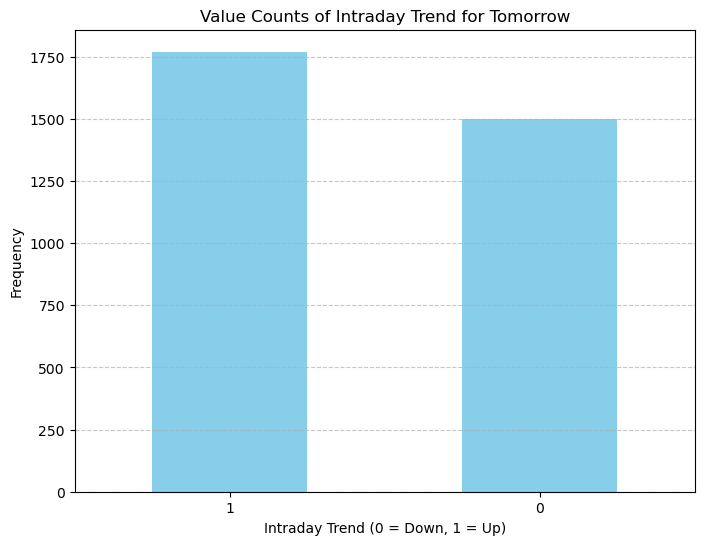

In [212]:
value_counts = target_df['intraday_trend_tomorrow'].value_counts()

plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Value Counts of Intraday Trend for Tomorrow')
plt.xlabel('Intraday Trend (0 = Down, 1 = Up)')
plt.ylabel('Frequency')

# Darstellung der Diagramms
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [213]:
df_all = pd.concat([df, target_df], axis=1)
df_all.head(3)

,open,high,low,close,vwap,upper,basis,lower,ema20,ema200,...,ema9,volume,volume_ma,trend_direction,rsi,rsi-based_ma,histogram,mom,1_day_trend,intraday_trend_tomorrow
0,1398.00,1406.25,1395.75,1403.25,1343.34,1401.04,1370.81,1340.58,1389.44,1287.55,...,1399.42,1619524,1682877.10,1,61.72,66.11,-1.09,4.75,0,1
1,1407.25,1417.75,1399.00,1412.50,1344.42,1403.91,1372.95,1341.99,1391.63,1288.80,...,1402.03,1718652,1692012.90,1,65.31,65.87,-0.69,8.50,1,0
2,1412.00,1414.25,1399.50,1408.75,1345.40,1405.60,1374.79,1343.97,1393.26,1289.99,...,1403.38,1673086,1653121.70,1,62.74,65.54,-0.77,8.75,0,0


In [214]:
df_all.corr()['intraday_trend_tomorrow'].sort_values(ascending=True)

1_day_trend               -0.03
histogram                 -0.01
ema200                    -0.01
vwap                      -0.01
upper                     -0.01
close                     -0.01
high                      -0.01
mom                       -0.01
ema9                      -0.01
open                      -0.01
low                       -0.01
ema50                     -0.01
ema20                     -0.01
basis                     -0.01
lower                     -0.01
rsi                       -0.01
rsi-based_ma              -0.00
trend_direction           -0.00
volume_ma                 -0.00
volume                     0.02
intraday_trend_tomorrow    1.00
Name: intraday_trend_tomorrow, dtype: float64

<h1 style="color: #FF8C00;">04 | Modeling</h1>

In [215]:
'''X = df
y = target_df'''

'X = df\ny = target_df'

In [216]:
X = df_all.drop("intraday_trend_tomorrow", axis=1)
y = df_all["intraday_trend_tomorrow"]

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [218]:
print(f'100% of our data: {len(df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 3271.
70% for training data: 2616.
30% for test data: 655.


In [219]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [220]:
predictions = model.predict(X_test)

In [221]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.47      0.02      0.04       297
           1       0.55      0.98      0.70       358

    accuracy                           0.55       655
   macro avg       0.51      0.50      0.37       655
weighted avg       0.51      0.55      0.40       655



In [222]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [223]:
model = LogisticRegression(solver='saga', max_iter=1000000) 
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000000, solver='saga')

In [224]:
predictions = model.predict(X_test_scaled)

In [225]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.41      0.02      0.04       297
           1       0.55      0.97      0.70       358

    accuracy                           0.54       655
   macro avg       0.48      0.50      0.37       655
weighted avg       0.48      0.54      0.40       655



<Figure size 800x600 with 0 Axes>

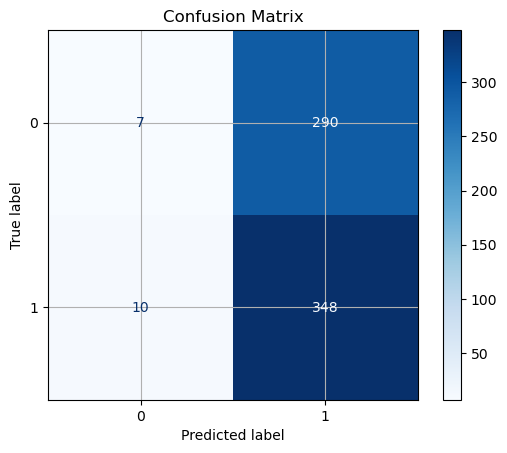

In [226]:
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(True)
plt.show()

<h1 style="color: #FF8C00;">05 | Feature and Target Engineering Part2 </h1>

high/low
high/close
close/low
close/open
vwap/close
ema/close
close-upper 
close/basis
lower-close
volume/volume_ma
rsi/rsi_ma
histogram-histogram row before, if positive then 1, if negative then 0

In [227]:
new_df = pd.DataFrame({
    'high/low': df['high'] / df['low'],
    'high/close': df['high'] / df['close'],
    'close/low': df['close'] / df['low'],
    'close/open': df['close'] / df['open'],
    'vwap/close': df['vwap'] / df['close'],
    'ema9/close': df['ema20'] / df['close'],
    'ema20/close': df['ema20'] / df['close'],
    'ema50/close': df['ema50'] / df['close'],
    'ema200/close': df['ema200'] / df['close'],
    'close-upper': df['close'] - df['upper'],
    'close/basis': df['close'] / df['basis'],
    'lower-close': df['lower'] - df['close'],
    'volume/volume_ma': df['volume'] / df['volume_ma'],
    'rsi/rsi_ma': df['rsi'] / df['rsi-based_ma'],
    'histogram_diff_change': np.where(df['histogram'].diff() > 0, 1, 0)
})

new_df

,high/low,high/close,close/low,close/open,vwap/close,ema9/close,ema20/close,ema50/close,ema200/close,close-upper,close/basis,lower-close,volume/volume_ma,rsi/rsi_ma,histogram_diff_change
0,1.01,1.00,1.01,1.00,0.96,0.99,0.99,0.97,0.92,2.21,1.02,-62.67,0.96,0.93,0
1,1.01,1.00,1.01,1.00,0.95,0.99,0.99,0.96,0.91,8.59,1.03,-70.51,1.02,0.99,1
2,1.01,1.00,1.01,1.00,0.96,0.99,0.99,0.97,0.92,3.15,1.02,-64.78,1.01,0.96,0
3,1.01,1.01,1.00,0.99,0.97,1.00,1.00,0.98,0.93,-14.31,1.01,-49.35,1.11,0.83,0
4,1.01,1.01,1.00,1.00,0.97,1.00,1.00,0.98,0.93,-17.62,1.01,-45.17,0.94,0.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,1.02,1.00,1.01,1.01,1.04,1.02,1.02,1.04,1.01,-432.70,0.97,-30.61,0.96,1.16,1
3267,1.02,1.01,1.00,0.99,1.04,1.02,1.02,1.04,1.01,-427.16,0.97,-24.82,0.84,1.14,1
3268,1.02,1.01,1.01,1.01,1.03,1.01,1.01,1.03,1.00,-359.45,0.98,-92.53,0.78,1.25,1
3269,1.01,1.01,1.01,1.00,1.04,1.01,1.01,1.03,1.00,-362.69,0.98,-77.20,0.74,1.22,1


In [228]:
additional_columns = df_all[['mom', '1_day_trend', 'intraday_trend_tomorrow']]
new_df = pd.concat([new_df, additional_columns], axis=1)

In [229]:
new_df.head(5)

,high/low,high/close,close/low,close/open,vwap/close,ema9/close,ema20/close,ema50/close,ema200/close,close-upper,close/basis,lower-close,volume/volume_ma,rsi/rsi_ma,histogram_diff_change,mom,1_day_trend,intraday_trend_tomorrow
0,1.01,1.00,1.01,1.00,0.96,0.99,0.99,0.97,0.92,2.21,1.02,-62.67,0.96,0.93,0,4.75,0,1
1,1.01,1.00,1.01,1.00,0.95,0.99,0.99,0.96,0.91,8.59,1.03,-70.51,1.02,0.99,1,8.50,1,0
2,1.01,1.00,1.01,1.00,0.96,0.99,0.99,0.97,0.92,3.15,1.02,-64.78,1.01,0.96,0,8.75,0,0
3,1.01,1.01,1.00,0.99,0.97,1.00,1.00,0.98,0.93,-14.31,1.01,-49.35,1.11,0.83,0,-4.25,0,0
4,1.01,1.01,1.00,1.00,0.97,1.00,1.00,0.98,0.93,-17.62,1.01,-45.17,0.94,0.82,0,1.25,0,0


In [230]:
new_df.corr()['intraday_trend_tomorrow'].sort_values(ascending=True)

1_day_trend               -0.03
close/open                -0.02
close/low                 -0.02
close/basis               -0.01
mom                       -0.01
high/low                  -0.01
ema200/close              -0.00
rsi/rsi_ma                -0.00
histogram_diff_change     -0.00
vwap/close                 0.00
close-upper                0.00
ema50/close                0.01
high/close                 0.01
ema9/close                 0.01
ema20/close                0.01
lower-close                0.02
volume/volume_ma           0.02
intraday_trend_tomorrow    1.00
Name: intraday_trend_tomorrow, dtype: float64

In [231]:
new_df2 = pd.DataFrame({
    'high/low_change': np.where(new_df['high/low'].diff() > 0, 1, 0),
    'high/close_change': np.where(new_df['high/close'].diff() > 0, 1, 0),
    'close/low_change': np.where(new_df['close/low'].diff() > 0, 1, 0),
    'close/open_change': np.where(new_df['close/open'].diff() > 0, 1, 0),
    'vwap/close_change': np.where(new_df['vwap/close'].diff() > 0, 1, 0),
    'ema9/close_change': np.where(new_df['ema9/close'].diff() > 0, 1, 0),
    'ema20/close_change': np.where(new_df['ema20/close'].diff() > 0, 1, 0),
    'ema50/close_change': np.where(new_df['ema50/close'].diff() > 0, 1, 0),
    'ema200/close_change': np.where(new_df['ema200/close'].diff() > 0, 1, 0),
    'close-upper_change': np.where(new_df['close-upper'].diff() > 0, 1, 0),
    'close/basis_change': np.where(new_df['close/basis'].diff() > 0, 1, 0),
    'lower-close_change': np.where(new_df['lower-close'].diff() > 0, 1, 0),
    'volume/volume_ma_change': np.where(new_df['volume/volume_ma'].diff() > 0, 1, 0),
    'rsi/rsi_ma_change': np.where(new_df['rsi/rsi_ma'].diff() > 0, 1, 0),
    'histogram_diff_change': np.where(new_df['histogram_diff_change'].diff() > 0, 1, 0)
})

additional_columns = df_all[['mom', '1_day_trend', 'intraday_trend_tomorrow']]
new_df2 = pd.concat([new_df2, additional_columns], axis=1)

In [232]:
new_df2.corr()['intraday_trend_tomorrow'].sort_values(ascending=True).round(5)

close/open_change         -0.04
close/basis_change        -0.03
1_day_trend               -0.03
close-upper_change        -0.03
rsi/rsi_ma_change         -0.02
close/low_change          -0.02
mom                       -0.01
histogram_diff_change     -0.01
high/low_change           -0.00
volume/volume_ma_change    0.00
ema9/close_change          0.02
ema20/close_change         0.02
lower-close_change         0.02
ema200/close_change        0.03
high/close_change          0.03
ema50/close_change         0.03
vwap/close_change          0.03
intraday_trend_tomorrow    1.00
Name: intraday_trend_tomorrow, dtype: float64

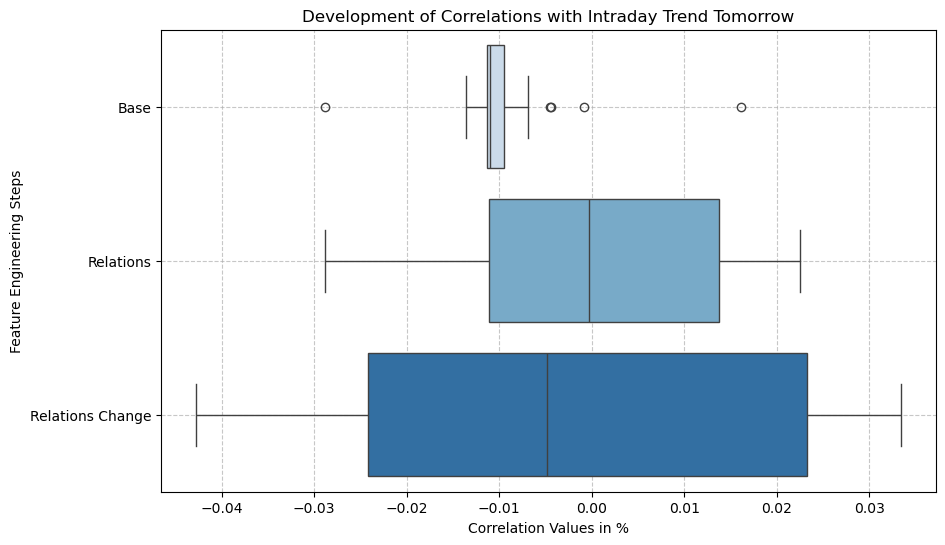

In [233]:
# correlation comparison
correlations_box1 = df_all.corr()['intraday_trend_tomorrow'].drop('intraday_trend_tomorrow').sort_values(ascending=True).round(5)
correlations_box2 = new_df.corr()['intraday_trend_tomorrow'].drop('intraday_trend_tomorrow').sort_values(ascending=True).round(5)
correlations_box3 = new_df2.corr()['intraday_trend_tomorrow'].drop('intraday_trend_tomorrow').sort_values(ascending=True).round(5)


combined_correlations = pd.DataFrame({
    'Base': correlations_box1,
    'Relations': correlations_box2,
    'Relations Change': correlations_box3
})


plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_correlations, orient='h', palette='Blues')


plt.title('Development of Correlations with Intraday Trend Tomorrow')
plt.xlabel('Correlation Values in %')
plt.ylabel('Feature Engineering Steps')


plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [234]:
X = new_df2.drop("intraday_trend_tomorrow", axis=1)
y = new_df2["intraday_trend_tomorrow"]

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [236]:
model_uptrend = LogisticRegression()
model_uptrend.fit(X_train, y_train)

LogisticRegression()

In [237]:
predictions = model_uptrend.predict(X_test)

In [238]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.47      0.05      0.09       297
           1       0.55      0.95      0.70       358

    accuracy                           0.54       655
   macro avg       0.51      0.50      0.39       655
weighted avg       0.51      0.54      0.42       655



In [239]:
print("Test data accuracy: ",model_uptrend.score(X_test,y_test))
print("Train data accuracy: ", model_uptrend.score(X_train, y_train))

Test data accuracy:  0.5435114503816794
Train data accuracy:  0.543960244648318


In [240]:
cm = confusion_matrix(y_test, predictions)

<Figure size 800x600 with 0 Axes>

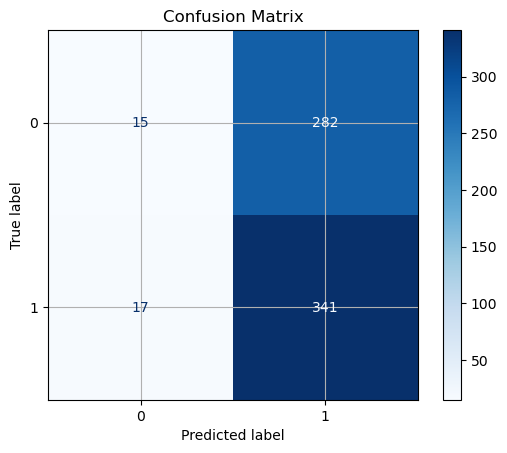

In [241]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(True)
plt.show()

<h2 style="color: #FF6347;">Oversampling with SMOTE</h2>

In [242]:
X = new_df2.drop("intraday_trend_tomorrow", axis=1)
y = new_df2["intraday_trend_tomorrow"]

In [243]:
# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTE only on training data
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display class distribution after SMOTE
print("Original class distribution:\n", y_train.value_counts())
print("Resampled class distribution:\n", pd.Series(y_train_resampled).value_counts())

Original class distribution:
 intraday_trend_tomorrow
1    1412
0    1204
Name: count, dtype: int64
Resampled class distribution:
 intraday_trend_tomorrow
0    1412
1    1412
Name: count, dtype: int64


In [244]:
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [245]:
predictions = model.predict(X_test)

In [246]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.44      0.41      0.42       297
           1       0.53      0.56      0.55       358

    accuracy                           0.49       655
   macro avg       0.48      0.48      0.48       655
weighted avg       0.49      0.49      0.49       655



In [247]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train_resampled, y_train_resampled))

Test data accuracy:  0.4916030534351145
Train data accuracy:  0.5169971671388102


<Figure size 800x600 with 0 Axes>

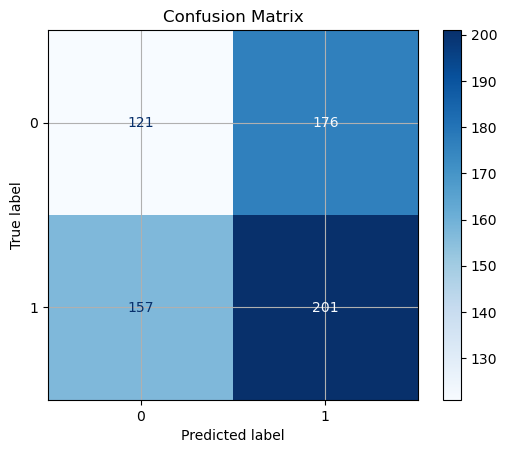

In [248]:
cm2 = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(True)
plt.show()

<h2 style="color: #FF6347;">Undersampling with TomekLinks --> Model Downtrend</h2>

In [249]:
X = new_df2.drop("intraday_trend_tomorrow", axis=1)
y = new_df2["intraday_trend_tomorrow"]

In [250]:
tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X, y)

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=42)

In [252]:
y.value_counts()

intraday_trend_tomorrow
1    1770
0    1501
Name: count, dtype: int64

In [253]:
y_tl.value_counts()

intraday_trend_tomorrow
0    1501
1    1384
Name: count, dtype: int64

In [254]:
model_downtrend = LogisticRegression()
model_downtrend.fit(X_tl, y_tl)

LogisticRegression()

In [255]:
predictions = model_downtrend.predict(X_test)

In [256]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.54      0.68      0.60       303
           1       0.50      0.35      0.41       274

    accuracy                           0.52       577
   macro avg       0.52      0.51      0.50       577
weighted avg       0.52      0.52      0.51       577



In [257]:
print("Test data accuracy: ",model_downtrend.score(X_test,y_test))
print("Train data accuracy: ", model_downtrend.score(X_tl, y_tl))

Test data accuracy:  0.5233968804159446
Train data accuracy:  0.5265164644714038


<Figure size 800x600 with 0 Axes>

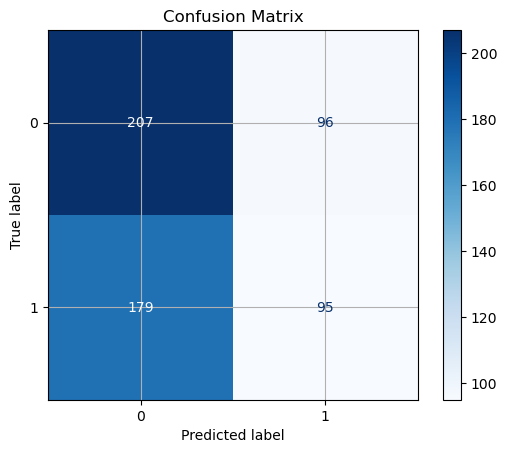

In [ ]:
cm3 = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
plt.figure(figsize=(8, 6))

disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(True)
plt.show()

In [259]:
from sklearn.ensemble import VotingClassifier

# Assuming you have trained classifiers 'model_oversample' and 'model_undersample'
ensemble_model = VotingClassifier(estimators=[
    ('oversample', model_uptrend),
    ('undersample', model_downtrend)
], voting='soft')  # 'hard' for majority voting, 'soft' for averaged probabilities

ensemble_model.fit(X_train_resampled, y_train_resampled) #data from smote

VotingClassifier(estimators=[('oversample', LogisticRegression()),
                             ('undersample', LogisticRegression())],
                 voting='soft')

In [260]:
predictions = ensemble_model.predict(X_test)

In [261]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.52      0.45      0.48       303
           1       0.47      0.53      0.50       274

    accuracy                           0.49       577
   macro avg       0.49      0.49      0.49       577
weighted avg       0.49      0.49      0.49       577



In [262]:
print("Test data accuracy: ",ensemble_model.score(X_test,y_test))
print("Train data accuracy: ", ensemble_model.score(X_train_resampled, y_train_resampled))

Test data accuracy:  0.4904679376083189
Train data accuracy:  0.5169971671388102


<Figure size 800x600 with 0 Axes>

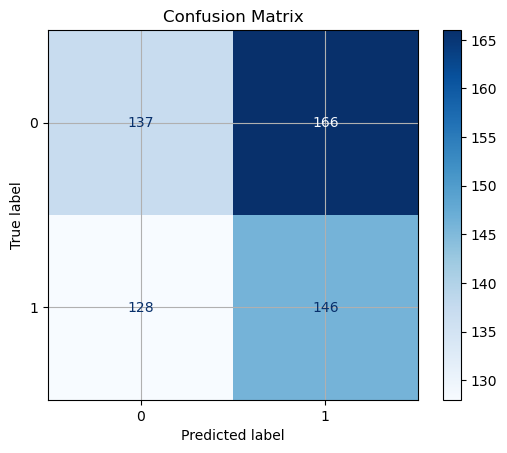

In [263]:
cm4 = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm4)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(True)
plt.show()

Lazy Regressor

In [264]:
from lazypredict.Supervised import LazyRegressor

In [265]:
regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = regressor.fit(X_train_resampled, X_test, y_train_resampled, y_test)

print(models.head(20)) 

100%|██████████| 42/42 [00:04<00:00, 10.43it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 303
[LightGBM] [Info] Number of data points in the train set: 2824, number of used features: 17
[LightGBM] [Info] Start training from score 0.500000
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.71       0.72  0.27        0.29
RandomForestRegressor                        0.65       0.66  0.29        0.45
DecisionTreeRegressor                        0.63       0.64  0.30        0.01
ExtraTreeRegressor                           0.61       0.62  0.31        0.01
BaggingRegressor                             0.61       0.62  0.31        0.06
XGBRegressor                               

RandomForestRegressor

In [266]:
X = new_df2.drop("intraday_trend_tomorrow", axis=1)
y = new_df2["intraday_trend_tomorrow"]

In [267]:
tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X, y)

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=42)

In [269]:
y.value_counts()

intraday_trend_tomorrow
1    1770
0    1501
Name: count, dtype: int64

In [270]:
y_tl.value_counts()

intraday_trend_tomorrow
0    1501
1    1384
Name: count, dtype: int64

In [271]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_tl, y_tl)

RandomForestClassifier(random_state=42)

In [272]:
predictions = model_rf.predict(X_test)

In [273]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       303
           1       0.99      0.97      0.98       274

    accuracy                           0.98       577
   macro avg       0.98      0.98      0.98       577
weighted avg       0.98      0.98      0.98       577



In [277]:
print("Test data accuracy: ",model_rf.score(X_test,y_test))
print("Train data accuracy: ", model_rf.score(X_tl, y_tl))

Test data accuracy:  0.9792027729636048
Train data accuracy:  0.9767764298093587


<Figure size 800x600 with 0 Axes>

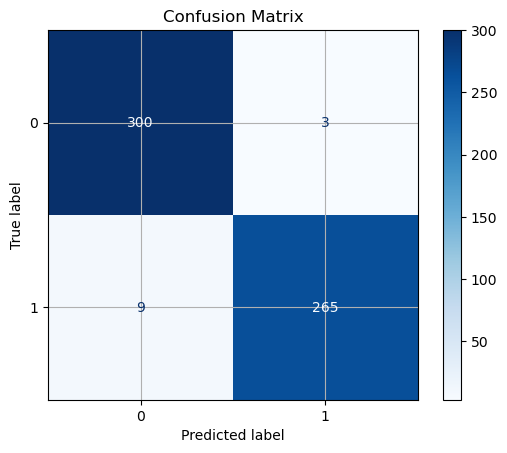

In [275]:
cm_final = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_final)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(True)
plt.show()

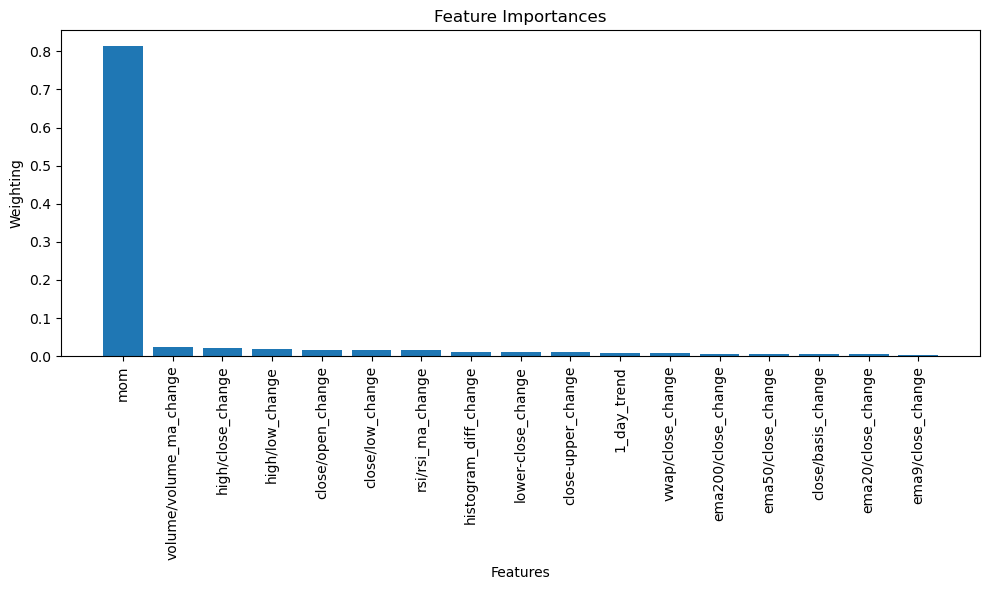

In [276]:
feature_names = list(X_tl.columns)
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1] # sorts indices of importances in descending order

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Weighting")
plt.tight_layout()
plt.show()